# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
%matplotlib inline


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from functools import reduce

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
#observations
#1. For the treament of mouse r944 with Capomulin the treament seemed to have effect as the size of the tumor decresed.
#2. The drug Ramicane showed the best results on limitig the growth of the tumor.
#3. The drug Infubinol performed worst in the tests.

In [4]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
# Combine the data into a single DataFrame
merge_mice_df = pd.merge(study_results, mouse_metadata,
                      how='left', left_on='Mouse ID', right_on ='Mouse ID')
# Display the data table for preview
merge_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice.
merge_mice_df['Mouse ID'].nunique()

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_mice_unique_id = merge_mice_df.loc[merge_mice_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
merge_mice_unique_id

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
df_merge_mice_unique_id_um = merge_mice_df.loc[merge_mice_df["Mouse ID"] == "g989", :]
df_merge_mice_unique_id_um

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_mice_df_2 = merge_mice_df[merge_mice_df['Mouse ID'] != 'g989']

In [11]:
# Checking the number of mice in the clean DataFrame.
merge_mice_df_2['Mouse ID'].nunique()

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
merge_mice_drug_gr_df = merge_mice_df_2.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(['mean', 'median','var', 'std','sem']).reset_index()
merge_mice_drug_gr_df = merge_mice_drug_gr_df.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume	','var': 'Tumor Volume Variance',
                                                              'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'})
merge_mice_drug_gr_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume\t,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
merge_mice_drug_gr_2 = merge_mice_df_2.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median','var', 'std','sem'])
merge_mice_drug_gr_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

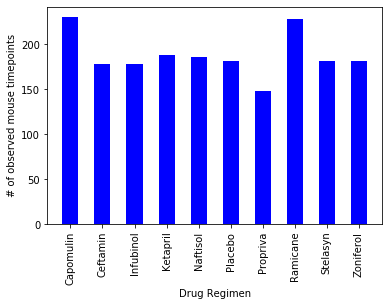

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
merge_mice_df_3 = merge_mice_df_2.groupby('Drug Regimen').agg({'Timepoint':'count'}).reset_index()
Drug_Regimen = merge_mice_df_3['Drug Regimen']
Timepoints = merge_mice_df_3['Timepoint']
plt.bar(Drug_Regimen, Timepoints, color='b', align='center', width = 0.5)
plt.xticks(rotation=90)
plt.ylabel('# of observed mouse timepoints')
plt.xlabel("Drug Regimen")

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

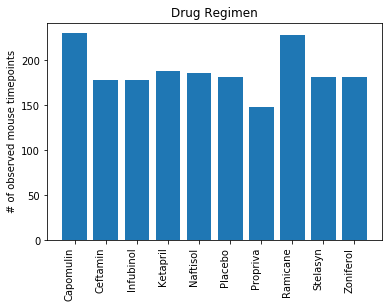

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
merge_mice_df_3 = merge_mice_df_2.groupby('Drug Regimen').agg({'Timepoint':'count'}).reset_index()
Drug_Regimen_list = merge_mice_df_3['Drug Regimen']
Timepoints_list = merge_mice_df_3['Timepoint']
fig, ax = plt.subplots()
ax.bar(Drug_Regimen_list, Timepoints_list, label=Drug_Regimen_list)
ax.set_ylabel('# of observed mouse timepoints')
ax.set_title("Drug Regimen")
plt.xticks(rotation=90, ha='right')


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
merge_mice_df_2_2 = merge_mice_df_2.copy()
merge_mice_df_2_2['count'] = 1
plot = merge_mice_df_2_2.groupby(['Sex']).sum().plot(
    kind='pie', y='count',legend=None)
plot.set_ylabel('Sex')



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
merge_mice_df_2_3 = merge_mice_df_2.copy()
sex_g = merge_mice_df_2_3.groupby('Sex').size().reset_index(name='count')
sex = sex_g['Sex'].tolist()
count = sex_g['count'].tolist()

fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = sex)
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
merge_mice_df_2_1 = merge_mice_df_2.copy()
Capomulin_mouse_df = merge_mice_df_2_1[merge_mice_df_2_1['Drug Regimen'] == 'Capomulin']
Capomulin_mouse_df2 = Capomulin_mouse_df.groupby('Mouse ID').max()['Timepoint'].reset_index()

Ramicane_mouse = merge_mice_df_2_1[merge_mice_df_2_1['Drug Regimen'] == 'Ramicane']
Ramicane_mouse_df2 = Ramicane_mouse.groupby('Mouse ID').max()['Timepoint'].reset_index()

Infubinol_mouse = merge_mice_df_2_1[merge_mice_df_2_1['Drug Regimen'] == 'Infubinol']
Infubinol_mouse_df2 = Infubinol_mouse.groupby('Mouse ID').max()['Timepoint'].reset_index()

Ceftamin_mouse = merge_mice_df_2_1[merge_mice_df_2_1['Drug Regimen'] == 'Ceftamin']
Ceftamin_mouse_df2 = Ceftamin_mouse.groupby('Mouse ID').max()['Timepoint'].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_Capomulin_mouse = pd.merge(Capomulin_mouse_df2, merge_mice_df_2_1,
                      how='left', left_on=['Mouse ID','Timepoint'], right_on =['Mouse ID','Timepoint'])
merge_Ramicane_mouse = pd.merge(Ramicane_mouse_df2, merge_mice_df_2_1,
                      how='left', left_on=['Mouse ID','Timepoint'], right_on =['Mouse ID','Timepoint'])
Infubinol_mouse_mouse = pd.merge(Infubinol_mouse_df2, merge_mice_df_2_1,
                      how='left', left_on=['Mouse ID','Timepoint'], right_on =['Mouse ID','Timepoint'])
merge_Ceftamin_mouse = pd.merge(Ceftamin_mouse_df2, merge_mice_df_2_1,
                      how='left', left_on=['Mouse ID','Timepoint'], right_on =['Mouse ID','Timepoint'])
df_con_1 = pd.concat([merge_Ramicane_mouse, merge_Capomulin_mouse], axis=0)
df_con_2 = pd.concat([df_con_1, Infubinol_mouse_mouse], axis=0)
df_con_3 = pd.concat([df_con_2, merge_Ceftamin_mouse], axis=0)
merge_mice_df_3 = df_con_3.copy()

In [ ]:
merge_mice_df_3

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list =  list(merge_mice_df_3["Drug Regimen"])

#got the example for this function from geeks for geeks
ans_list = reduce(lambda re, x: re+[x] if x not in re else re, treatment_list, [])

# Create empty list to fill with tumor vol data (for plotting)
plot_data_list = []
for x in ans_list:
    df = merge_mice_df_3[merge_mice_df_3["Drug Regimen"] == x]
    list_data = list(df['Tumor Volume (mm3)'])
    plot_data_list.append(list_data)

df_q = pd.DataFrame(plot_data_list)
df_q = df_q.transpose()
df_q.columns = ans_list
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for (Name, Data) in df_q.iteritems():
    quartiles = Data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    quartiles = quartiles.round(2)
    lowerq = lowerq.round(2)
    upperq = upperq.round(2)
    iqr = iqr.round(2)
    print(f"The lower quartile of the drug: {Name} is: {lowerq}")
    print(f"The upper quartile of the drug: {Name} is: {upperq}")
    print(f"The interquartile range of the drug: {Name} is: {iqr}")
    print(f"The the median of the drug: {Name} is: {quartiles[0.5]} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be tumor outliers.")
    print(f"Values above {upper_bound} could be tumor outliers.")
    print('\n')
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = df_q.boxplot(column=ans_list)
boxplot.set_ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df_line = merge_mice_df_2.copy()
df_line_2 = df_line[(df_line['Drug Regimen'] == 'Capomulin') & (df_line['Mouse ID'] == 'r944')]
fig = df_line_2.plot( 'Timepoint' , 'Tumor Volume (mm3)' )
fig.set_ylabel('Tumor Volume (mm3)')
fig.set_xlabel('Timepoint (Days)')

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
df_scat = merge_mice_df_2.copy()
df_scat_2 = df_scat[df_scat['Drug Regimen'] == 'Capomulin']
df_scat_2 = df_scat_2.groupby(["Mouse ID",'Weight (g)'], as_index=False)['Tumor Volume (mm3)'].mean()
fig = df_scat_2.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)', s = 100)
fig.set_ylabel('Tumor Volume (mm3)')
fig.set_xlabel('Timepoint (Days)')

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
df_reg = merge_mice_df_2.copy()
df_reg_2 = df_reg.groupby(["Mouse ID",'Weight (g)'], as_index=False)['Tumor Volume (mm3)'].mean()
nr_weight = df_reg_2['Weight (g)']
nr_tumor = df_reg_2['Tumor Volume (mm3)']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(nr_tumor, nr_weight)
pe_fit = pe_slope * nr_weight + pe_int

df_scat = merge_mice_df_2.copy()
df_scat_2 = df_scat[df_scat['Drug Regimen'] == 'Capomulin']
df_scat_2 = df_scat_2.groupby(["Mouse ID",'Weight (g)'], as_index=False)['Tumor Volume (mm3)'].mean()
fig = df_scat_2.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)', s = 100)
fig.set_ylabel('Tumor Volume (mm3)')
fig.set_xlabel('Timepoint (Days)')